# Social Distancing Simulation

The model consists of a graph, with students as nodes and edges as relationships between students. There is a 2x2 normal form game that occurs once on each edge, where the actions for each player are {socially distance, not socially distance}.

In [1]:
import matplotlib.pyplot as plt
from network import Network
from evaluator import Evaluator
import networkx as nx
from networkx.algorithms import centrality
import importlib
import numpy as np

In [2]:
network = Network(10, 300)

In [3]:
g = network.generate_network()

In [4]:
network.get_node_attrs(5)

{'senior': True, 'ic': False, 'icf': False}

In [5]:
evaluator = Evaluator({'close': 50, 'friend': 10}, {'close': 10, 'friend': 5}, .5, 1, network)

In [6]:
evaluator.virus_disutility(2)

-61.550000000000004

In [7]:
g.edges()

EdgeView([(0, 20), (0, 36), (0, 77), (0, 84), (0, 85), (0, 93), (0, 104), (0, 114), (0, 142), (0, 231), (1, 24), (1, 47), (1, 70), (1, 76), (1, 86), (1, 139), (2, 11), (2, 23), (2, 28), (2, 35), (2, 39), (2, 58), (2, 130), (2, 179), (2, 244), (3, 68), (3, 149), (3, 167), (3, 216), (3, 288), (4, 13), (4, 57), (4, 62), (4, 103), (4, 187), (4, 213), (5, 12), (5, 15), (5, 18), (5, 22), (5, 27), (5, 34), (5, 48), (5, 54), (5, 72), (5, 73), (5, 97), (5, 98), (5, 99), (5, 108), (5, 153), (5, 169), (5, 183), (5, 236), (5, 262), (5, 271), (6, 10), (6, 19), (6, 32), (6, 33), (6, 41), (6, 67), (6, 258), (7, 31), (7, 60), (7, 75), (7, 81), (8, 16), (8, 17), (8, 18), (8, 115), (8, 162), (8, 215), (8, 272), (9, 123), (9, 126), (9, 141), (9, 151), (9, 182), (9, 217), (10, 19), (10, 32), (10, 33), (10, 38), (10, 41), (10, 42), (10, 43), (10, 69), (10, 82), (10, 150), (10, 201), (10, 258), (11, 23), (11, 28), (11, 35), (11, 39), (11, 53), (11, 77), (11, 106), (11, 172), (11, 192), (12, 15), (12, 22), (

In [23]:
def get_ne_stats():
    outcomes_lst = []
    for rho in np.arange(0, 1., .1):
        evaluator = Evaluator({'close': 50, 'friend': 10}, {'close': 10, 'friend': 5}, rho, 1, network)
        outcomes = {'both_distance': 0, 'conflict': 0, 'meet_up': 0}
        for edge in g.edges():
            payoff_matrix = evaluator.generate_payoff_matrix(edge[0], edge[1])
            print(payoff_matrix)
            (row_action, col_action) = evaluator.get_pure_nash_idx(payoff_matrix, 2)
            print(row_action, col_action)
            if row_action != col_action:
                outcomes['conflict'] += 1
            else:
                if row_action == 0:
                    outcomes['both_distance'] += 1
                else:
                    outcomes['meet_up'] += 1
        outcomes_lst.append(outcomes)
        break
    return outcomes_lst

In [24]:
ne_stats = get_ne_stats()

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.821883712058009, 6.335302472800362)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (15.473123654393675, 14.752098488366752)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (17.05115093351436, 5.33983124560023)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.660014029585119, 12.982037785069812)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.5130908572694795, 9.912348092834272)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (11.776615965459651, 6.785497823530676)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (13.696314924885076, 7.889012122793249)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (11.916723983852473, 7.930018541458885)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (5.498803171235847, 10.268713598457994)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.780629159137908, 6.280286661693142)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (4.3249737431557165, 12.35361336254013

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (14.843967108759728, 18.654078719822223)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.782078763987242, 12.176416849024514)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (11.987081962642263, 11.134541629481973)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (15.612548848719452, 15.959375844635431)]]
1 [1]
[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (15.816769692710492, 6.695128389286591)]]
1 [1]
[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.009906874831694, 15.287086988219896)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.287064322181026, 1.8877602452598996)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (13.655017931726029, 3.4033724662331144)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (0.8285876183727474, 8.596322151434727)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.466723203739148, 19.439240125769516)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.076164513306882, 7.61273

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (2.247276105664943, 9.248416808871633)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.2588120786224, 16.86310639880807)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (3.6340812868609094, 4.289246513416739)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (13.806860174185658, 11.070248547386596)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.565582485655483, 11.172451342926093)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (5.3690768797098425, 14.253370182941445)]]
1 [1]
[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (14.762328518614083, 1.9190931855629607)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (3.8584370895123143, 7.013406856386307)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (7.782942735534757, -0.35723111921025286)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (23.591223670347194, 9.72108214994883)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (61.14377037627509, 35.85396564608

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.603555573626242, 11.327357430624994)]]
0 [0]
[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (17.760188408372564, 10.369247140069517)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (14.864094475000634, 8.010184534795357)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (15.983732477283422, 9.462405214217815)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (9.464134528134505, 7.3395488774454085)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.591777294574992, 11.983470290856884)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (9.982341636379907, 6.205866264685509)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (2.9369879295831405, 13.34975527100974)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (9.104743872031039, 2.1824182365898555)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.636836454479592, 6.595818456974994)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (13.24943591841806, 11.585167241825

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.016715373004297, 11.289758162283704)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.590374621526652, 13.75090234426778)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (13.442734857497015, 9.124578496028372)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.817074105096713, 8.235552006414029)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (4.485547041230168, 2.400784506000031)]]
1 [1]
[[(0.0, -0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.910379629914466, 11.690110006724282)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (11.406347586628819, 3.926957128916171)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.759859637947974, 11.278843276749361)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (56.717770656380075, 35.71361136285208)]]
0 [0]
[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.74651177717848, 3.4374180077349408)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (19.03744062116822, -1.1716864247771

[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (17.468995896127716, 6.632869181601526)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (18.616456544369008, 9.61972965168613)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (7.169888157250128, 10.423959624006553)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (46.329536616713206, 70.74420340345887)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (9.67097679253409, 6.4624689602161265)]]
1 [1]
[[(-0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (9.579430285750348, 6.797642883680172)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (15.50640348902926, -1.7919831091150389)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (-0.4906775715012408, 10.883446641387152)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (3.7275626857418684, 6.841465163665706)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.002096223242962, 9.77090921612185)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (13.287797476914022, 11.963406302834

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (14.529760562180067, 17.288870781165762)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (5.993840908213837, 8.057215167152163)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.334603025501705, 8.436444042164572)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (34.53846030667357, 66.2501391174639)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (7.891540112806341, 11.842657750649776)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (20.990519249860558, 18.233145842991178)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (3.972519191391026, 5.086746720463795)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.628225772287976, 5.162346722151205)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.303723591617224, 10.951212502682523)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.685703911243976, 19.034909882293615)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.952197371000757, 3.78075788109967

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (11.749197696991677, 9.456752603681009)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (7.515102989428797, 8.497007520196615)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (47.330340139952426, 43.45471384680072)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.710594086448488, 15.58498301191386)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (7.919033448507754, 10.617333197035522)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (46.046162730288124, 61.52549421707512)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (4.539679292733906, 13.39494427224413)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.06634174985433, 16.01247511058459)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (6.996837980936084, 7.265187259546389)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (1.8921466392415702, 5.954916359291251)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.411715621010824, 8.057976668772621)]]

[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (15.626232599069805, 7.285596101218319)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (5.250289684104967, 10.503856087091343)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (16.980513319837257, 5.134214826718209)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.232231423394968, 4.4523381474924575)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (10.652774013844569, 10.564176769203431)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (49.81076262851404, 66.53297233889228)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.017068865473565, 5.475285408222297)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (46.366789876419105, 42.90711750361687)]]
0 [0]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (12.957596082908557, 4.833008811550098)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (8.487999379185565, 7.946891818648937)]]
1 [1]
[[(0.0, 0.0), (-1.0, -1.0)], [(-1.0, -1.0), (5.221173814864068, 12.6535840841565

In [21]:
ne_stats

[]

In [14]:
def get_percent_meet_up(ne_stats):
    percents = []
    for outcomes in ne_stats:
        percents.append(outcomes['meet_up'] / g.number_of_edges())
    return percents

In [16]:
def plot_rho_vs_ne(percent_meeting_up):
    plt.plot(np.arange(0, 1., .1), percent_meeting_up)
    plt.title("Fraction of Meetups Over Rho")
    plt.xlabel("Rho")
    plt.ylabel("Fraction of Agents who Choose to Meet")
    plt.savefig("plots/percent_meet_up_vs_rho_g" + str(g.number_of_nodes()))
    plt.show()

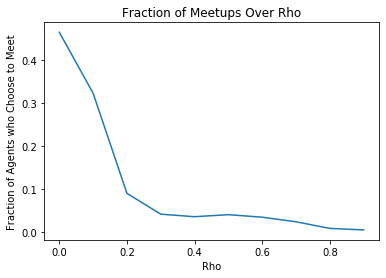

In [17]:
plot_rho_vs_ne(get_percent_meet_up(ne_stats))

In [ ]:
count = 0
for key in nx.get_node_attributes(g, 'ic'):
    if nx.get_node_attributes(g, 'ic')[key] == 1:
        count +=1
print(count)

In [ ]:
deg_cent = centrality.degree_centrality(g)
for node in deg_cent:
    print(deg_cent[node] * g.number_of_nodes())

In [ ]:
nx.draw(g)
plt.draw()

In [ ]:
g_test = nx.Graph()
g_test.add_node(1, senior=True)

In [ ]:
g_test.nodes()